In [1]:
# import packages

%run packages.ipynb

Using TensorFlow backend.
/home/ziyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ziyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ziyu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ziyu/anaconda3/lib/python3.7/site-packages/tensorflow/py

In [2]:
import tensorflow as tf
greeting = tf.constant('Hello Google Tensorflow!')
sess = tf.Session()
result = sess.run(greeting)
print(result)
sess.close()

b'Hello Google Tensorflow!'


In [2]:
# import data
%run def_rasterToDF.ipynb
# new 13_15 land class data
luccraster_data = np.load("./LUCC_13_15" +".npy")
luccraster_data = replace_class(luccraster_data)
# NEWdf2013_data is the new flow 3+original rasterfile 8+ new 13_15 neighbour data 5+ lucc2013 2015 2=16 rows
feature = np.load("./NewDF2013" +".npy")
df2013=pd.DataFrame(feature)
del feature

In [3]:
df2013['change']=df2013[14]-df2013[15]
#df2013['change'][~df2013['change'].isin(0.0)]=1
df2013['change'][df2013['change']!=0.0] = 1 

In [4]:
df2013['change'].value_counts()

0.0    33040357
1.0     2665937
Name: change, dtype: int64

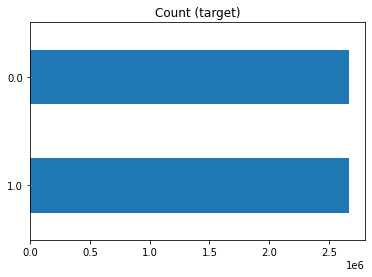

In [5]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=66)
X = df2013.iloc[:,:16].to_numpy()
y = df2013.iloc[:,16].to_numpy()
X_rus, y_rus = rus.fit_sample(X, y)
indices = rus.sample_indices_
# 组成pandas的格式
DataAll = pd.DataFrame(X_rus)
DataAll['labels'] = y_rus
# 进行绘图
target_count = DataAll.labels.value_counts()
target_count.plot(kind='barh', title='Count (target)');

In [8]:
DataAll

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,labels
0,3079.56700,3743.54800,-663.98100,53.0,5.258953,0.00,120.00000,566.0389,30.00000,16.0,0.0,0.0,0.0,8.0,5.0,5.0,0.0
1,-9999.00000,-9999.00000,0.00000,-9999.0,-9999.000000,-9999.00,-9999.00000,-9999.0000,-9999.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-9999.00000,-9999.00000,0.00000,-9999.0,-9999.000000,-9999.00,-9999.00000,-9999.0000,-9999.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,89.81182,94.50066,-4.68884,378.0,13.832300,30414.79,1134.06300,7786.1420,94.86833,16.0,0.0,4.0,0.0,4.0,1.0,1.0,0.0
4,-9999.00000,-9999.00000,0.00000,-9999.0,-9999.000000,-9999.00,-9999.00000,-9999.0000,-9999.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331869,1435.18400,1638.52100,-203.33700,19.0,-9999.000000,26244.39,150.00000,256.3201,543.32310,5.0,0.0,0.0,0.0,9.0,5.0,1.0,1.0
5331870,1726.20700,1820.24300,-94.03600,18.0,-9999.000000,26288.94,212.13200,150.0000,569.21000,6.0,0.0,0.0,0.0,8.0,1.0,5.0,1.0
5331871,1433.64900,1633.53100,-199.88200,24.0,-9999.000000,26195.55,42.42641,453.9824,570.00000,0.0,0.0,2.0,0.0,11.0,3.0,5.0,1.0
5331872,1433.85900,1634.20100,-200.34200,23.0,-9999.000000,26206.42,60.00000,424.2641,570.00000,0.0,0.0,2.0,0.0,10.0,3.0,5.0,1.0


In [6]:
def DF_to_TrainFeature(resultDF):
    # 非边界的行索引提出来
    df2 = resultDF[(resultDF[14]>0) & (resultDF[4]!=-9999.0)]
    noneBackground_index=df2.index.values
    # 对8+6进行归一化
    feature1=df2.iloc[:,0:14].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    feature3=feature1.values
    print('地物特征和邻域特征feature3:',feature3.shape)
    # 对第15行进行onehot编码
    class_lable = np_utils.to_categorical(df2.iloc[:,14]-1)
    print('头一年的地物类别onehot编码：',class_lable.shape)
    # 组合成完整的矩阵特征X
    X=np.concatenate([feature3,class_lable],axis=1)
    print('组合特征X：',X.shape)
    # 对2015年的地物标签y进行onehot编码
    LUCClable2015=df2.iloc[:,15]
    y = np_utils.to_categorical(LUCClable2015-1)
    print('组合标签y：',y.shape)
    
    return X,y

In [7]:
XX,yy=DF_to_TrainFeature(DataAll)

地物特征和邻域特征feature3: (3912289, 14)
头一年的地物类别onehot编码： (3912289, 5)
组合特征X： (3912289, 19)
组合标签y： (3912289, 5)


In [8]:
def splitTrainTestSet(X, y,testRatio=0.30):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                test_size=testRatio, random_state=345, stratify=y)
    ss=StratifiedShuffleSplit(n_splits=1, test_size=testRatio, 
                              train_size=1-testRatio, random_state=66)
    
    for train_index, test_index in ss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = splitTrainTestSet(XX, yy)#设置了0.5

TRAIN: [2440220  130450 3511829 ... 3864637 1746657 3775775] TEST: [ 513470 1682247  577178 ... 3890055 2322773 3000727]


In [39]:
# 获取分类类别总数
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=19))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Define optimization and train method
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=25, 
                              min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="./NNewresult/checkpoint_F.hdf5", verbose=1, 
                              save_best_only=True)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
                              metrics=['accuracy'])
# Start to train model 
#model.load_weights('checkpoint.hdf5')
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=120, 
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr, checkpointer],
                    class_weight = 'auto',
                    shuffle=True)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2738602 samples, validate on 1173687 samples
Epoch 1/120




2738602/2738602 [==============================] - 246s 90us/step - loss: 0.8043 - acc: 0.6764 - val_loss: 0.7694 - val_acc: 0.6878

Epoch 00001: val_loss improved from inf to 0.76940, saving model to ./NNewresult/checkpoint_F.hdf5
Epoch 2/120
2738602/2738602 [==============================] - 248s 91us/step - loss: 0.7608 - acc: 0.6903 - val_loss: 0.7539 - val_acc: 0.6924

Epoch 00002: val_loss improved from 0.76940 to 0.75390, saving model to ./NNewresult/checkpoint_F.hdf5
Epoch 3/120
2738602/2738602 [==============================] - 246s 90us/step - loss: 0.7518 - acc: 0.6933 - val_loss: 0.7486 - val_acc: 0.6948

Epoch 00003: val_loss improved from 0.75390 to 0.74859, saving model to ./NNewresult/checkpoint_F.hdf5
Epoch 4/120
2738602/2738602 [==============================] - 249s 91us/step - loss: 0.7456 - acc: 0

In [41]:
model.save('./NNewresult/LUCC_modelF_epochs120.h5')

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

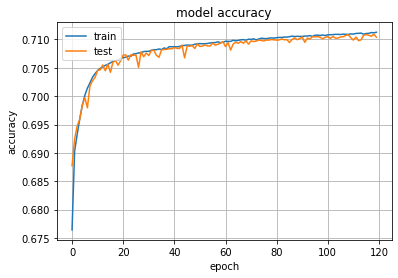

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

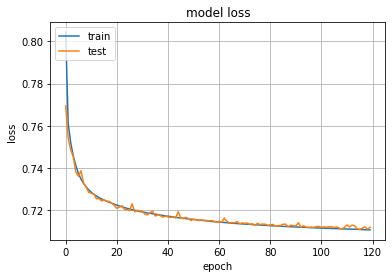

In [42]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./NNewresult/modelF_accuracy_120.svg")
plt.show()

# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./NNewresult/modelF_loss_120.svg")
plt.show()

In [10]:
X_NFtrain=X_train[:,3:]
X_NFtest=X_test[:,3:]

In [12]:
# 获取分类类别总数
modelNF = Sequential()
modelNF.add(Dense(32, activation='relu', input_dim=16))
modelNF.add(Dense(16, activation='relu'))
modelNF.add(Dense(5, activation='softmax'))
modelNF.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Define optimization and train method
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=25, 
                              min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="./NNewresult/checkpoint_NF.hdf5", verbose=1, 
                              save_best_only=True)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
modelNF.compile(loss='categorical_crossentropy', optimizer=sgd, 
                              metrics=['accuracy'])
# Start to train model 
#model.load_weights('checkpoint.hdf5')
historyNF = modelNF.fit(X_NFtrain, y_train, 
                    batch_size=32, 
                    epochs=120, 
                    verbose=1, 
                    validation_data=(X_NFtest, y_test),
                    callbacks=[reduce_lr, checkpointer],
                    class_weight = 'auto',
                    shuffle=True)

Train on 2738602 samples, validate on 1173687 samples
Epoch 1/120
2738602/2738602 [==============================] - 234s 86us/step - loss: 0.8145 - accuracy: 0.6741 - val_loss: 0.7829 - val_accuracy: 0.6824

Epoch 00001: val_loss improved from inf to 0.78294, saving model to ./NNewresult/checkpoint_NF.hdf5
Epoch 2/120
     32/2738602 [..............................] - ETA: 2:33:11 - loss: 0.7676 - accuracy: 0.6562

/home/ziyu/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


2738602/2738602 [==============================] - 235s 86us/step - loss: 0.7725 - accuracy: 0.6860 - val_loss: 0.7661 - val_accuracy: 0.6875

Epoch 00002: val_loss improved from 0.78294 to 0.76608, saving model to ./NNewresult/checkpoint_NF.hdf5
Epoch 3/120
2738602/2738602 [==============================] - 235s 86us/step - loss: 0.7616 - accuracy: 0.6895 - val_loss: 0.7579 - val_accuracy: 0.6912

Epoch 00003: val_loss improved from 0.76608 to 0.75793, saving model to ./NNewresult/checkpoint_NF.hdf5
Epoch 4/120
2738602/2738602 [==============================] - 234s 86us/step - loss: 0.7551 - accuracy: 0.6918 - val_loss: 0.7528 - val_accuracy: 0.6917

Epoch 00004: val_loss improved from 0.75793 to 0.75277, saving model to ./NNewresult/checkpoint_NF.hdf5
Epoch 5/120
2738602/2738602 [==============================] - 235s 86us/step - loss: 0.7507 - accuracy: 0.6934 - val_loss: 0.7526 - val_accuracy: 0.6933

Epoch 00005: val_loss improved from 0.75277 to 0.75257, saving model to ./NNewre

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

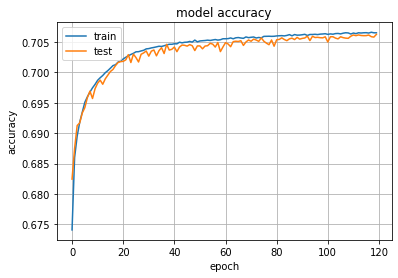

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

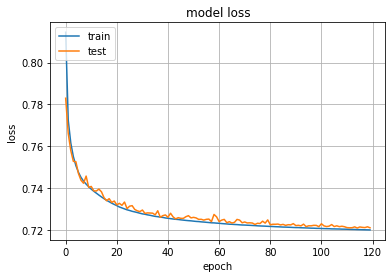

In [14]:
modelNF.save('./NNewresult/LUCC_modelNF_epochs120.h5')
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(historyNF.history['accuracy'])
plt.plot(historyNF.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./NNewresult/modelNF_accuracy_120.svg")
plt.show()

# summarize history for loss 
plt.plot(historyNF.history['loss'])
plt.plot(historyNF.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./NNewresult/modelNF_loss_120.svg")
plt.show()

In [19]:
yl_train=np.argmax(y_train,axis=1)

In [22]:
yl_test=np.argmax(y_test,axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(multi_class="multinomial",solver="newton-cg",class_weight='balanced')  #不输入参数时，默认情况下是OVR方式
log_reg.fit(X_train,yl_train)
print(log_reg.score(X_test,yl_test))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

0.6345899716023097


In [25]:
log_regNF=LogisticRegression(multi_class="multinomial",solver="newton-cg",class_weight='balanced')  #不输入参数时，默认情况下是OVR方式
log_regNF.fit(X_NFtrain,yl_train)
print(log_regNF.score(X_NFtest,yl_test))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

0.6359634212528553


In [26]:
conF=pd.DataFrame(log_reg.coef_)
conF['b']=log_reg.intercept_
conF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,b
0,0.563925,0.882405,-0.313631,0.336306,-0.846239,2.657624,8.257932,0.699634,-9.718515,0.270254,-3.116483,-2.487890,-1.271287,-1.839483,-1.660726,0.054101,0.164960,1.072936,0.368742,1.814237
1,-0.008669,-0.209744,0.241670,-7.804903,2.644941,-7.906436,-1.893546,-2.857318,-7.021950,0.928737,9.617939,0.137589,-0.035100,0.494093,1.096425,0.801808,1.108338,-4.669702,1.663110,-1.370666
2,-1.098814,0.438541,-1.994212,6.731206,0.898455,2.149400,7.147323,1.802964,3.659781,0.303093,-1.200044,2.636009,1.761013,0.670310,0.045041,-0.091309,-1.761975,1.791072,0.017165,-1.085699
3,0.871502,-2.299837,3.938409,1.187789,-1.242145,0.545626,-21.424668,-1.822584,18.369842,-1.051781,-4.355919,-0.318178,7.830501,-1.306912,0.354866,-1.427458,0.239914,0.711939,0.120744,0.095805
4,-0.327944,1.188635,-1.872236,-0.450397,-1.455012,2.553786,7.912960,2.177304,-5.289158,-0.450303,-0.945493,0.032470,-8.285126,1.981992,0.164394,0.662859,0.248763,1.093755,-2.169760,0.546324


In [27]:
conNF=pd.DataFrame(log_regNF.coef_)
conNF['b']=log_regNF.intercept_
conNF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,b
0,-0.062240,-0.922471,2.166782,8.340029,0.894002,-9.867200,0.282463,-3.226690,-2.512889,-1.157493,-1.782586,-1.661815,0.040011,0.179559,1.071506,0.370740,2.074989
1,-7.535597,2.635491,-7.869892,-2.021163,-3.075731,-7.195870,0.854556,9.512511,0.046194,-0.180744,0.395294,1.085998,0.792101,1.104980,-4.646226,1.663147,-1.274050
2,6.772379,0.928490,2.202633,7.319681,1.805596,3.783950,0.286086,-1.210975,2.659847,1.759907,0.658369,0.064681,-0.113198,-1.758982,1.787550,0.019949,-1.742471
3,1.588411,-1.120284,1.368024,-21.657883,-1.887279,18.650364,-0.946517,-4.064324,-0.188726,7.779773,-1.301206,0.329377,-1.359984,0.213134,0.695421,0.122053,0.628007
4,-0.762954,-1.521226,2.132454,8.019335,2.263413,-5.371244,-0.476588,-1.010522,-0.004426,-8.201442,2.030130,0.181760,0.641070,0.261309,1.091749,-2.175889,0.313525
